In [ ]:
# IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report


In [ ]:
#READING THE EXCEL FILE
df=pd.read_csv("breast-cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
#HANDLING CATEGORICAL VALUES
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
df["diagnosis"]=le.fit_transform(df["diagnosis"])
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
#SEAPRATING X AND Y i.e. FEATURE AND TARGET

x=df.iloc[:,2:].values
x

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [ ]:
y=df.iloc[:,1].values
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [ ]:
#SPLITTING INTO XTRAIN AND YTRAIN

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=1,test_size=0.20)

In [ ]:
#SCALING IN PROPER MANNER
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
xtrain=ss.fit_transform(xtrain)
xtest=ss.transform(xtest)

In [ ]:
#APPLYING EARLY STOPPING 
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=9)

In [ ]:
#ADDING HIDDEN LAYERS AND OUTPUT LAYERS 
ann=Sequential()

ann.add(Dense(units=8,activation="relu"))
ann.add(Dense(units=9,activation="relu"))
ann.add(Dense(units=6,activation="relu"))
ann.add(Dense(units=1,activation="sigmoid"))

In [ ]:
ann.compile(optimizer="sgd",loss="binary_crossentropy",metrics=["accuracy"])

ann.fit(xtrain,ytrain,validation_data=(xtest,ytest),verbose=1,callbacks=[early_stop],batch_size=40,epochs=600)

Epoch 1/600
12/12 [==============================] - 1s 22ms/step - loss: 0.6737 - accuracy: 0.6088 - val_loss: 0.6714 - val_accuracy: 0.6053
Epoch 2/600
12/12 [==============================] - 0s 5ms/step - loss: 0.6445 - accuracy: 0.6418 - val_loss: 0.6471 - val_accuracy: 0.6404
Epoch 3/600
12/12 [==============================] - 0s 6ms/step - loss: 0.6199 - accuracy: 0.6703 - val_loss: 0.6250 - val_accuracy: 0.6754
Epoch 4/600
12/12 [==============================] - 0s 7ms/step - loss: 0.5986 - accuracy: 0.7033 - val_loss: 0.6048 - val_accuracy: 0.6842
Epoch 5/600
12/12 [==============================] - 0s 7ms/step - loss: 0.5781 - accuracy: 0.7341 - val_loss: 0.5850 - val_accuracy: 0.7105
Epoch 6/600
12/12 [==============================] - 0s 6ms/step - loss: 0.5575 - accuracy: 0.7604 - val_loss: 0.5663 - val_accuracy: 0.7281
Epoch 7/600
12/12 [==============================] - 0s 6ms/step - loss: 0.5375 - accuracy: 0.7736 - val_loss: 0.5481 - val_accuracy: 0.7632
Epoch 8/600


In [ ]:
ann.history.history

{'loss': [0.6736800074577332,
  0.6444770097732544,
  0.6199088096618652,
  0.598555326461792,
  0.5781198143959045,
  0.5575145483016968,
  0.5375059247016907,
  0.5179463624954224,
  0.49867039918899536,
  0.47973695397377014,
  0.4613807201385498,
  0.4436730146408081,
  0.4263646602630615,
  0.4097830355167389,
  0.39330628514289856,
  0.37717461585998535,
  0.3608686625957489,
  0.34396955370903015,
  0.32635146379470825,
  0.3095616400241852,
  0.294422447681427,
  0.2795521020889282,
  0.26561981439590454,
  0.25274667143821716,
  0.24113768339157104,
  0.23062175512313843,
  0.22122006118297577,
  0.21229179203510284,
  0.20438475906848907,
  0.19713690876960754,
  0.1902725249528885,
  0.1839284896850586,
  0.17784874141216278,
  0.17208555340766907,
  0.1666969209909439,
  0.16191403567790985,
  0.15704558789730072,
  0.15268318355083466,
  0.14862659573554993,
  0.14470629394054413,
  0.1410924792289734,
  0.13785578310489655,
  0.13486774265766144,
  0.13190248608589172,
  

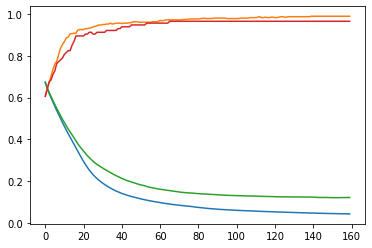

In [ ]:
plt.plot(pd.DataFrame(ann.history.history))
plt.show()

In [ ]:
yp=ann.predict(xtest)

4/4 [==============================] - 0s 3ms/step


In [ ]:
yp=np.where(yp<0.5,0,1)

In [ ]:
yp

array([[0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
    

In [ ]:
print(classification_report(ytest,yp))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114

